# Titanic Dataset

O conjunto de dados de teste conta com as seguintes variáveis: PassenderId: Passenger ID, Survived: Passnager Survival Indicator, Pclass: Passenger Class, Name: Name, Sex: Sex, Age: Age, SibSp: Number of Siblings/Spouses Aboard, Parch: Number of Parents/Children Aboard, Ticket: Ticket Number, Fare: Passenger Fare, Cabin: Cabin and Embarked: Port of Embarkation. 
Entretanto, vamos considerar as variáveis Survived, Pclass, Sex, Age, SibSp, Parch e Embarked.

## Carregando o pacote titanic

Vamos carregar o conjunto de dados por meio da biblioteca **titanic**.

In [4]:
#install.packages('titanic')
library('titanic');

In [5]:
#install.packages('knitr', dependencies = TRUE)
titanic_df <- subset(titanic_train, select = c('Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked'))
#knitr::kable(head(titanic_df))
head(titanic_df)

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,1,0,7.2500,S
1,1,female,38,1,0,71.2833,C
1,3,female,26,0,0,7.9250,S
1,1,female,35,1,0,53.1000,S
0,3,male,35,0,0,8.0500,S
0,3,male,NA,0,0,8.4583,Q


O conjunto de dados de treino conta com 891 observações e o conjunto de teste com 418 observações.

In [5]:
dim(titanic_df)

[1] 891   8

In [17]:
na_sum <- apply(X = titanic_df, MARGIN = 2, FUN = function(x) sum(is.na(x)))
t(na_sum)              

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,177,0,0,0,0


Vamos remover as observações com valores faltantes e considerar apenas as demais observações.

In [24]:
titanic_df <- na.omit(titanic_df)
head(titanic_df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,0,3,male,22,1,0,7.2500,S
2,1,1,female,38,1,0,71.2833,C
3,1,3,female,26,0,0,7.9250,S
4,1,1,female,35,1,0,53.1000,S
5,0,3,male,35,0,0,8.0500,S
7,0,1,male,54,0,0,51.8625,S


Agora, o conjunto de dados conta com 714 observações.

In [25]:
nrow(titanic_df)

[1] 714

### Vizualização dos dados

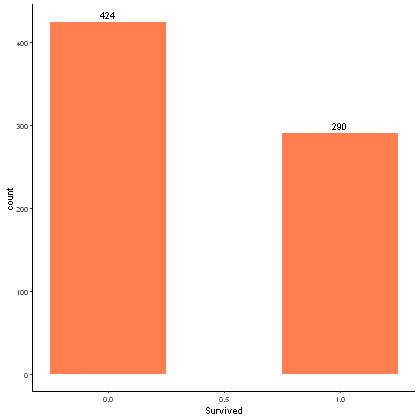

In [20]:
options(repr.plot.res = 60)
library(ggplot2)
ggplot(titanic_df, aes(x = Survived)) +
  geom_bar(width=0.5, fill = "coral") +
  geom_text(stat='count', aes(label=stat(count)), vjust=-0.5) +
  theme_classic()

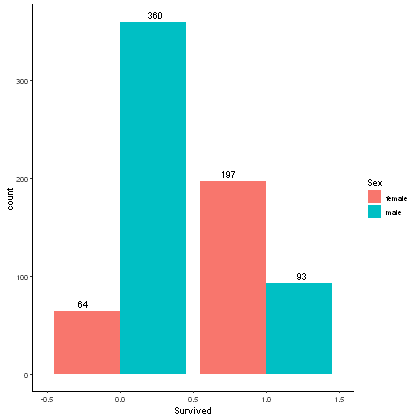

In [21]:
options(repr.plot.res = 60)
ggplot(titanic_df, aes(x = Survived, fill=Sex)) +
 geom_bar(position = position_dodge()) +
 geom_text(stat='count', 
           aes(label=stat(count)), 
           position = position_dodge(width=1), vjust=-0.5)+
 theme_classic()

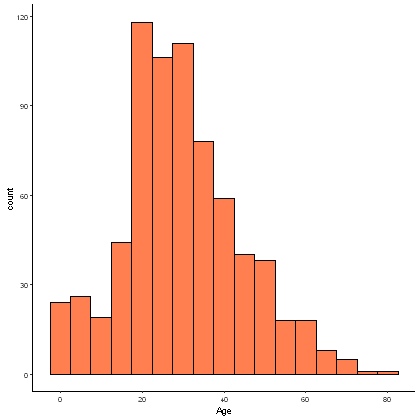

In [29]:
options(repr.plot.res = 60)
ggplot(titanic_df, aes(x = Age)) +
 geom_histogram(color="black", fill="coral", binwidth = 5) +
 theme_classic()

In [35]:
titanic_df$Survived <- factor(titanic_df$Survived)
titanic_df$Pclass = factor(titanic_df$Pclass, order=TRUE, levels = c(3, 2, 1))

### Diagrama de correlação

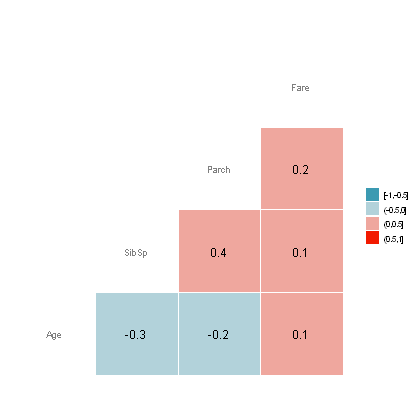

In [59]:
#install.packages('GGally')
library(GGally)

options(repr.plot.res = 60, warn = -1)
ggcorr(titanic_df,
       nbreaks = 4,
       label = TRUE,
       label_size = 5,
       color = 'grey50')

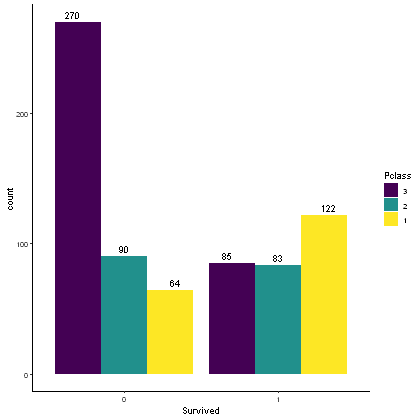

In [62]:
options(repr.plot.res = 60, warn = 0)
ggplot(titanic_df, aes(x = Survived, fill=Pclass)) +
 geom_bar(position = position_dodge()) +
 geom_text(stat='count', 
           aes(label=stat(count)), 
           position = position_dodge(width=1), 
           vjust=-0.5)+
 theme_classic()